<a href="https://colab.research.google.com/github/eildes06/02_DS_DATA_SCIENCE/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


burda hata alinca , error_bad_lines=False kodunu ekledim
https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data

In [ ]:
df0 = pd.read_csv("/content/drive/MyDrive/analitica/data1.csv", error_bad_lines=False,sep=";")
df= df0.copy()

sep=";" ekleyerek veriyi okuyabildim

#EDA

In [ ]:
df

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77,216,126,"279,1",83,"12,56","9,9",6,"2,67",2,0
3329,68,415,3703271,no,no,0,231,39,13,57,153,55,"191,3",123,"8,61","9,6",4,"2,59",3,0
3330,28,510,3288230,no,no,0,181,31,25,109,289,58,"191,9",91,"8,64","14,1",6,"3,81",2,0
3331,184,510,3646381,yes,no,0,214,36,14,105,160,84,"139,2",137,"6,26",5,10,"1,35",2,0


In [ ]:
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [ ]:
df.tail()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
3328,192,415,4144276,no,yes,36,156,27,18,77,216,126,"279,1",83,"12,56","9,9",6,"2,67",2,0
3329,68,415,3703271,no,no,0,231,39,13,57,153,55,"191,3",123,"8,61","9,6",4,"2,59",3,0
3330,28,510,3288230,no,no,0,181,31,25,109,289,58,"191,9",91,"8,64","14,1",6,"3,81",2,0
3331,184,510,3646381,yes,no,0,214,36,14,105,160,84,"139,2",137,"6,26",5,10,"1,35",2,0
3332,74,415,4004344,no,yes,25,234,40,23,113,266,82,"241,4",77,"10,86","13,7",4,"3,7",0,0


In [ ]:
df.shape

(3333, 20)

In [ ]:
df.columns

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [ ]:
df.isnull().sum()

account length                         0
location code                          0
user id                                0
credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
churn                                  0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

account length                          212
location code                             3
user id                                3333
credit card info save                     2
push status                               2
add to wishlist                          46
desktop sessions                        295
app sessions                             60
desktop transactions                     30
total product detail views              119
session duration                        287
promotion clicks                        123
avg order value                        1591
sale product views                      120
discount rate per visited products      933
product detail view per app session     162
app transactions                         21
add to cart per session                 162
customer service calls                   10
churn                                     2
dtype: int64

datada nokta olmasi gereken yerler virgul onlari duzeltelim.

In [ ]:
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

account length has 212 unique value
location code has 3 unique value
user id has 3333 unique value
add to wishlist has 46 unique value
desktop sessions has 295 unique value
app sessions has 60 unique value
desktop transactions has 30 unique value
total product detail views has 119 unique value
session duration has 287 unique value
promotion clicks has 123 unique value
sale product views has 120 unique value
app transactions has 21 unique value
customer service calls has 10 unique value
churn has 2 unique value


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.00,101.06,39.82,1.00,74.00,101.00,127.00,243.00
location code,3333.00,437.18,42.37,408.00,408.00,415.00,510.00,510.00
user id,3333.00,3746291.29,274662.57,3271058.00,3508680.00,3748187.00,3985970.00,4229964.00
add to wishlist,3333.00,8.10,13.69,0.00,0.00,0.00,20.00,51.00
desktop sessions,3333.00,179.81,54.46,0.00,144.00,179.00,216.00,351.00
app sessions,3333.00,30.57,9.27,0.00,24.00,31.00,37.00,60.00
desktop transactions,3333.00,17.09,4.32,0.00,14.00,17.00,20.00,31.00
total product detail views,3333.00,100.44,20.07,0.00,87.00,101.00,114.00,165.00
session duration,3333.00,201.04,50.71,0.00,167.00,201.00,235.00,364.00
promotion clicks,3333.00,100.11,19.92,0.00,87.00,100.00,114.00,170.00


datada nokta olmasi gereken ama virgul olan yerler var onlari duzeltiyorum.

In [ ]:
df["discount rate per visited products"]=df["discount rate per visited products"].replace(",",".",regex=True).astype(float)

In [ ]:
df["product detail view per app session"]=df["product detail view per app session"].replace(",",".",regex=True).astype(float)

In [ ]:
df["add to cart per session"]=df["add to cart per session"].replace(",",".",regex=True).astype(float)


In [ ]:
df["avg order value"]=df["avg order value"].replace(",",".",regex=True).astype(float)


In [ ]:
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.70,91,11.01,10.00,3,2.70,1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.40,103,11.45,13.70,3,3.70,1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.60,104,7.32,12.20,5,3.29,0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.90,89,8.86,6.60,7,1.78,2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.90,121,8.41,10.10,3,2.73,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3333 non-null   int64  
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

In [ ]:
df['credit card info save']=df['credit card info save'].map({'no': 0, 'yes': 1})
df['push status']=df['push status'].map({'no': 0, 'yes': 1})

In [ ]:
df.tail()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
3328,192,415,4144276,0,1,36,156,27,18,77,216,126,279.10,83,12.56,9.90,6,2.67,2,0
3329,68,415,3703271,0,0,0,231,39,13,57,153,55,191.30,123,8.61,9.60,4,2.59,3,0
3330,28,510,3288230,0,0,0,181,31,25,109,289,58,191.90,91,8.64,14.10,6,3.81,2,0
3331,184,510,3646381,1,0,0,214,36,14,105,160,84,139.20,137,6.26,5.00,10,1.35,2,0
3332,74,415,4004344,0,1,25,234,40,23,113,266,82,241.40,77,10.86,13.70,4,3.70,0,0


# Targetimiz olan churne bakiyoruz 

0    2850
1     483
Name: churn, dtype: int64


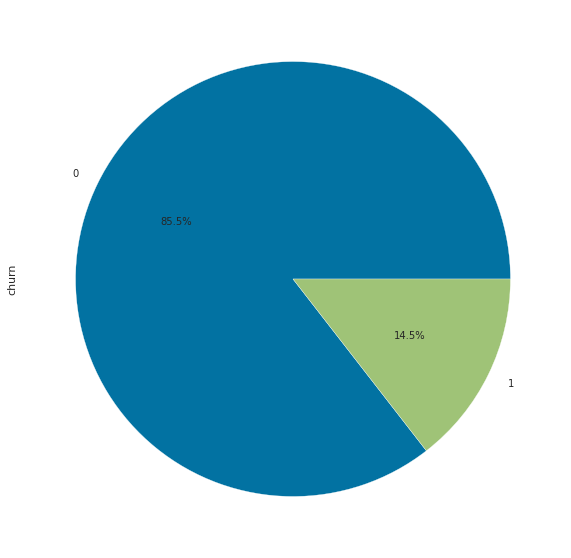

In [ ]:
print(df["churn"].value_counts())
df["churn"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

data imbalance buna bakmamiz lazim. bir scorelarimizi gorelim ona gore devam edelim.

In [ ]:
df['churn'].describe()

count   3333.00
mean       0.14
std        0.35
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: churn, dtype: float64

In [ ]:
a = round(df['churn'].value_counts()/len(df['churn']),2)
churn_ratio=  pd.DataFrame(a).T 
churn_ratio = churn_ratio.rename(columns={'no':'Not Churn' , 'yes':'Churn'})
churn_ratio 

,0,1
churn,0.86,0.14


Targetimizin featurelar ile iliskisini gorelim

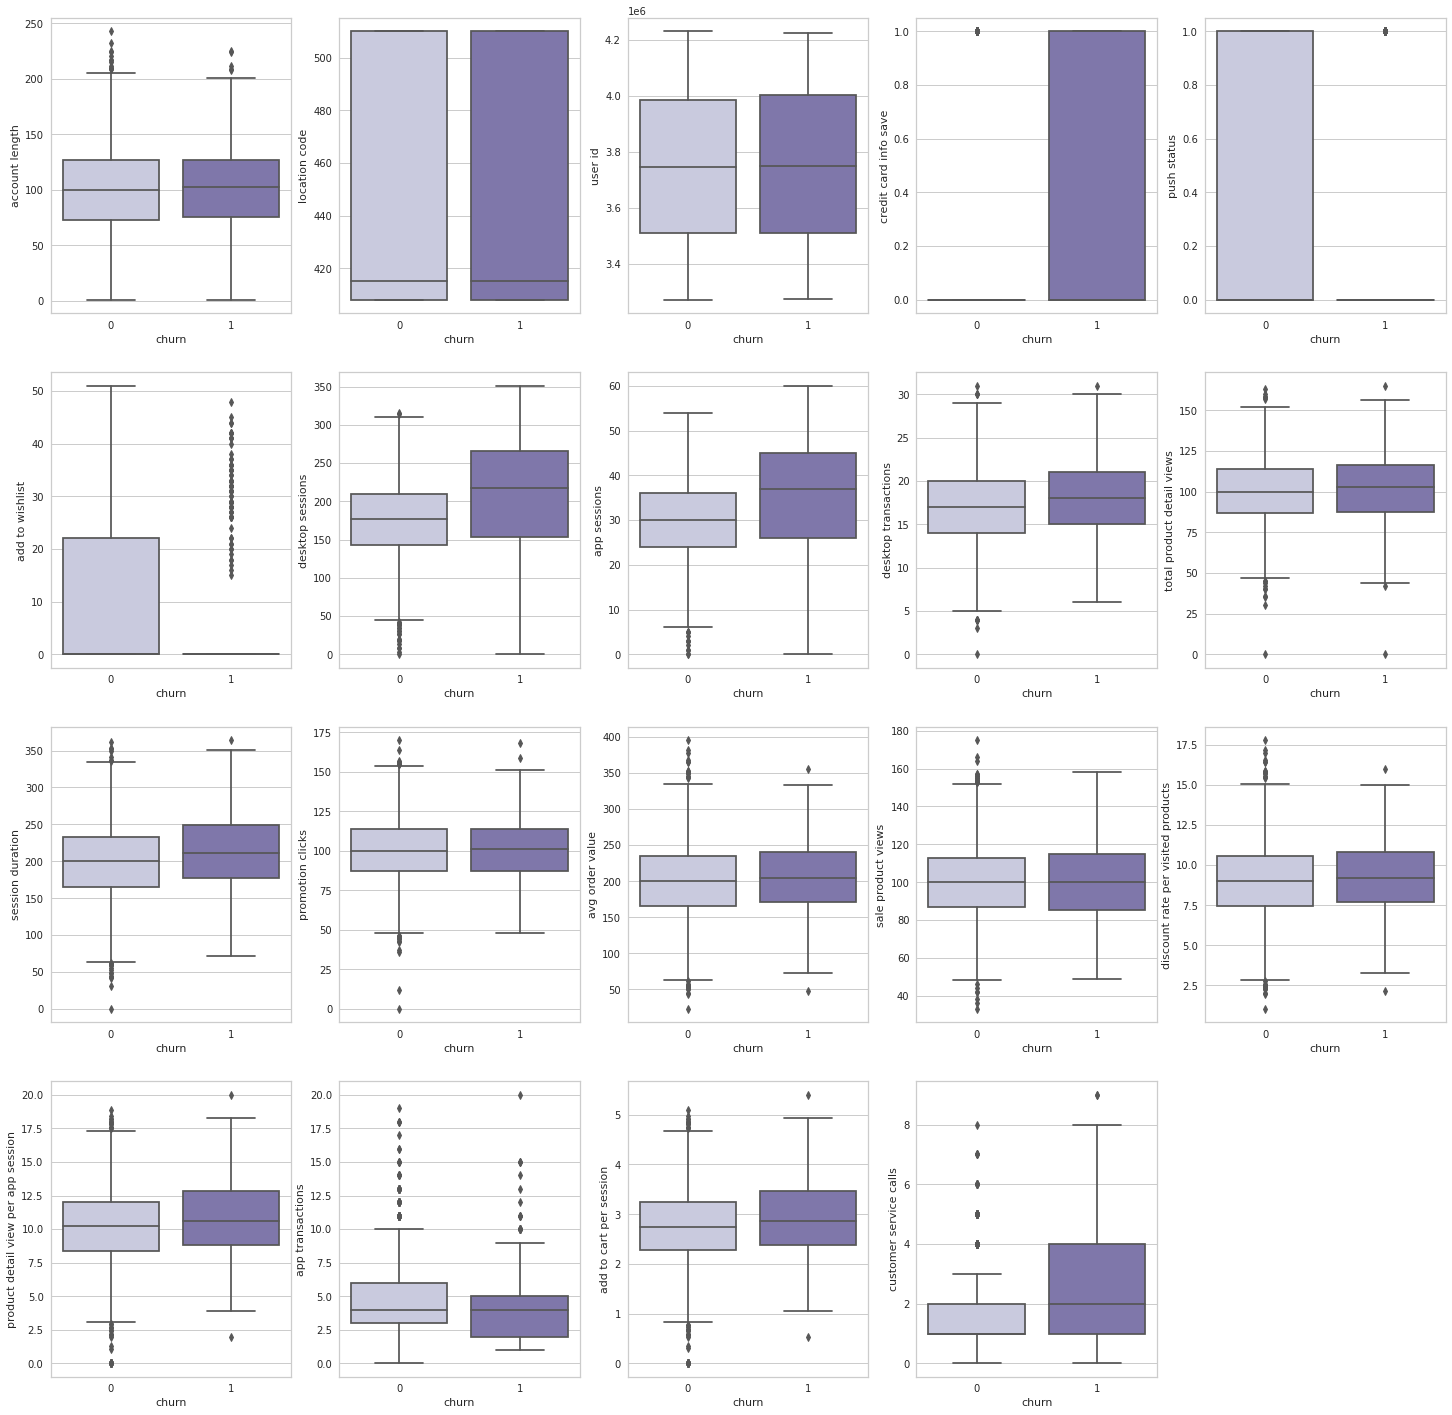

In [ ]:
index = 0
plt.figure(figsize=(25,25))
for feature in df:
    if feature != "churn":
        index += 1
        plt.subplot(4, 5, index)
        sns.boxplot(x='churn',palette="Purples",y=feature, data=df)

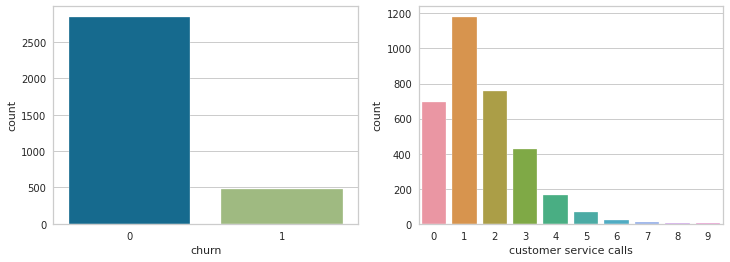

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="churn", data=df, ax=axes[0])
sns.countplot(x="customer service calls", data=df, ax=axes[1]);

In [ ]:
df.columns

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')

In [ ]:
df.drop(columns=['account length'] , axis=1 , inplace=True)

In [ ]:
categ_columns = []
for col in df.columns:
	if df[col].nunique()<10:
		categ_columns.append(col) 
        
print('categ numericals columns are {}'.format(categ_columns))

Num_cols = ['push status' ,'desktop sessions' ,'total product detail views',
       'app sessions', 'session duration', 'promotion clicks',
       'desktop transactions', 'avg order value', 'sale product views',
       'discount rate per visited products', 'product detail view per app session', 'app transactions',
       'add to cart per session' ]
print('nums numericals columns are {}'.format(Num_cols))

categ numericals columns are ['location code', 'credit card info save', 'push status', 'churn']
nums numericals columns are ['push status', 'desktop sessions', 'total product detail views', 'app sessions', 'session duration', 'promotion clicks', 'desktop transactions', 'avg order value', 'sale product views', 'discount rate per visited products', 'product detail view per app session', 'app transactions', 'add to cart per session']


In [ ]:
df.nunique().sort_values()

churn                                     2
push status                               2
credit card info save                     2
location code                             3
customer service calls                   10
app transactions                         21
desktop transactions                     30
add to wishlist                          46
app sessions                             60
total product detail views              119
sale product views                      120
promotion clicks                        123
product detail view per app session     162
add to cart per session                 162
session duration                        287
desktop sessions                        295
discount rate per visited products      933
avg order value                        1591
user id                                3333
dtype: int64

In [ ]:
#import matplotlib 
#print('matplotlib: {}'.format(matplotlib.__version__))

In [ ]:
#pip install matplotlib --upgrade

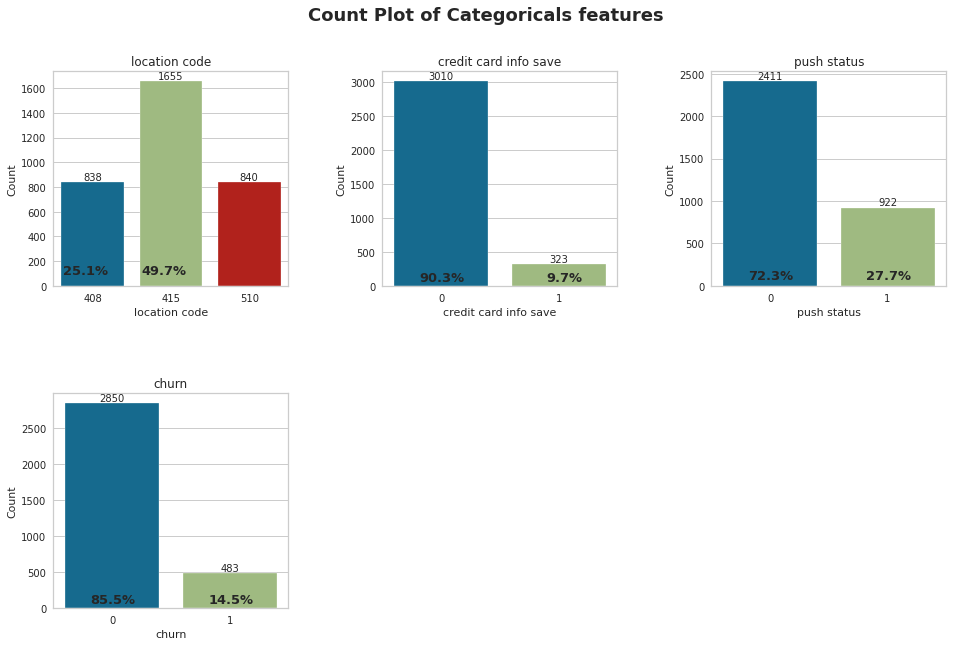

In [ ]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categ_columns):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(3, 3, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    #The below two lines of codes are used for percentage values.
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.set_title(f'{columns}')
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Count')
    ax1.bar_label(ax1.containers[0])

In [ ]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ];

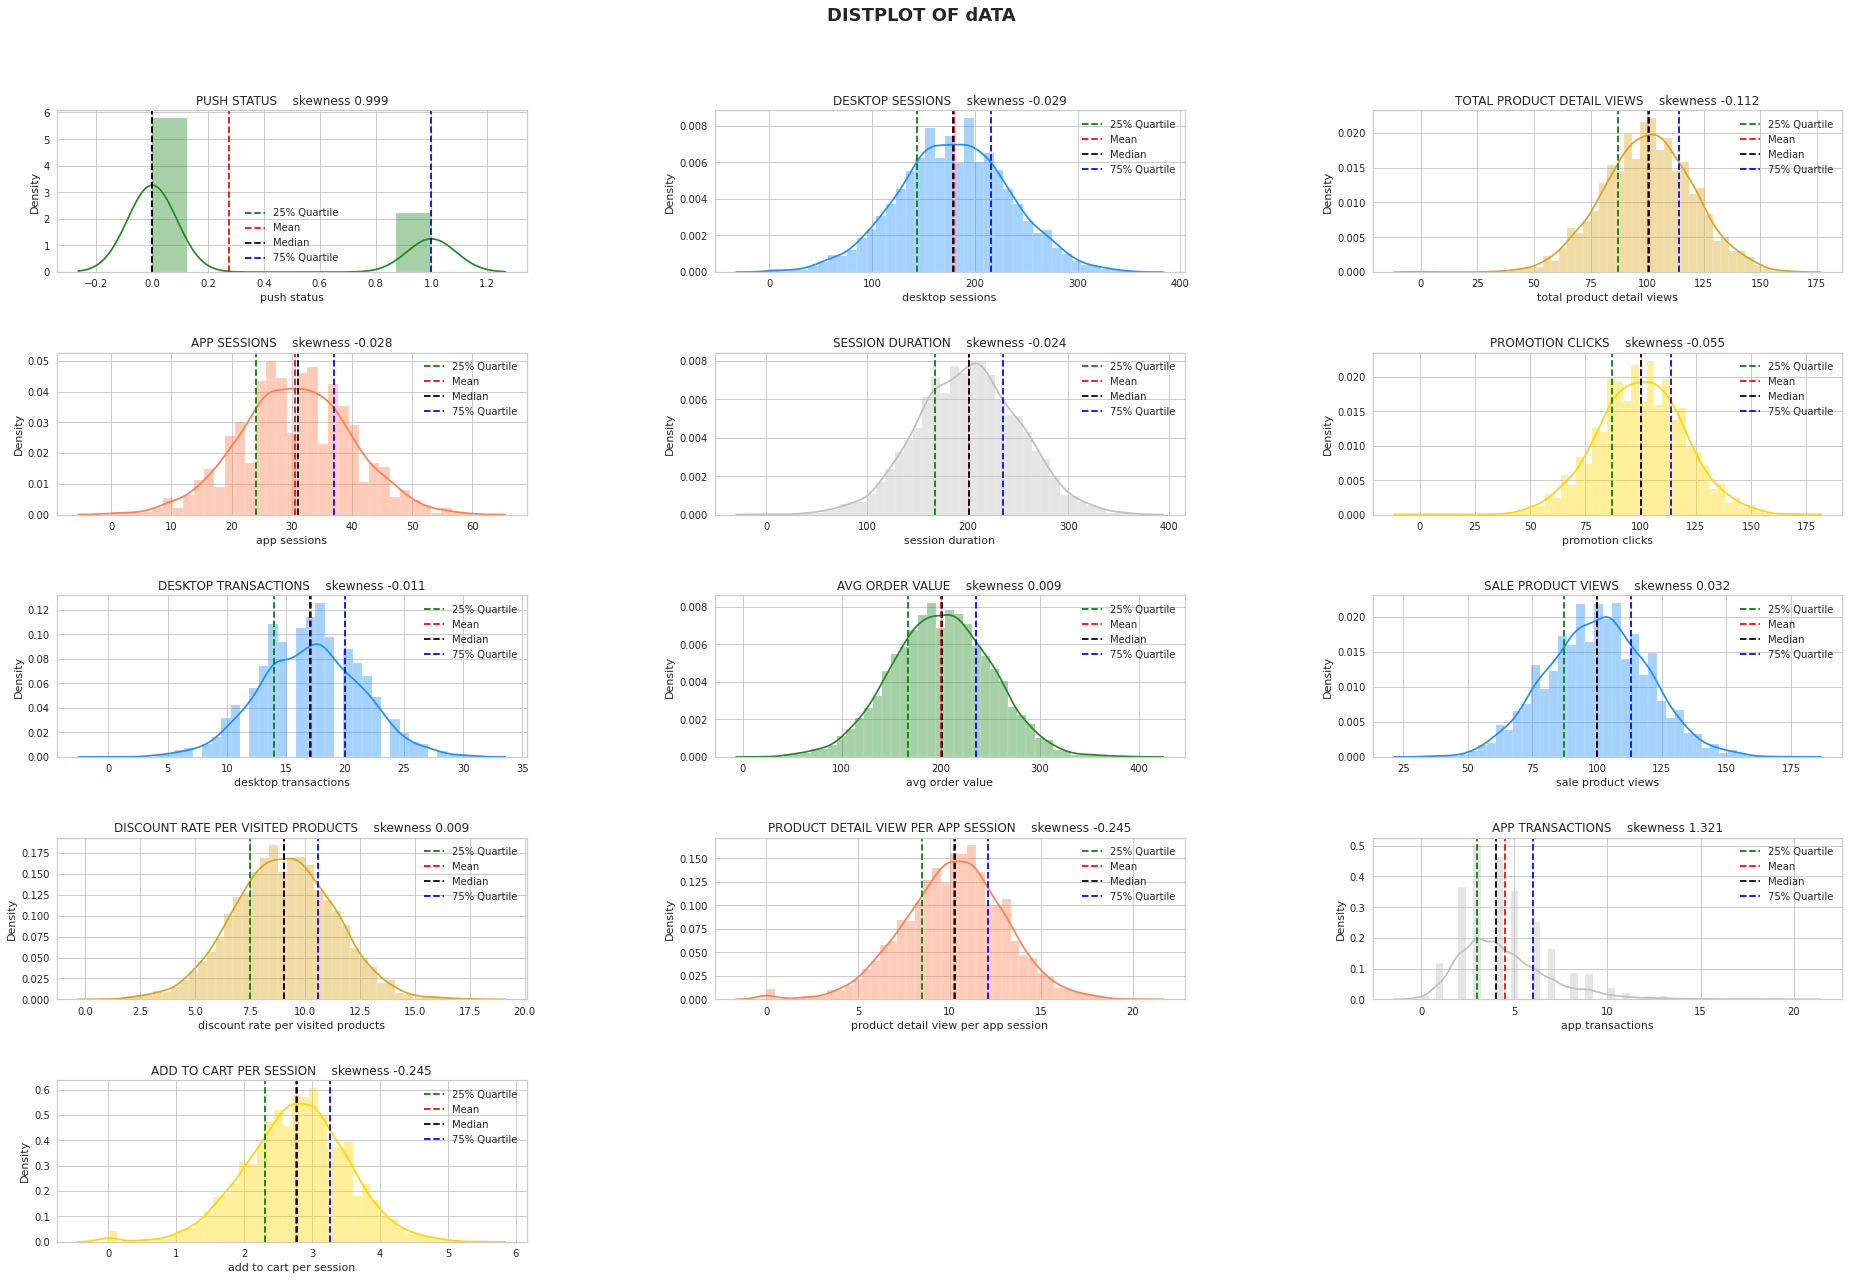

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax = fig.add_subplot(6, 3, i+1)
    ax = sns.distplot(df[col],  color=colours[i]) 
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}')
    ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}')
    ax.legend(fontsize=10) 

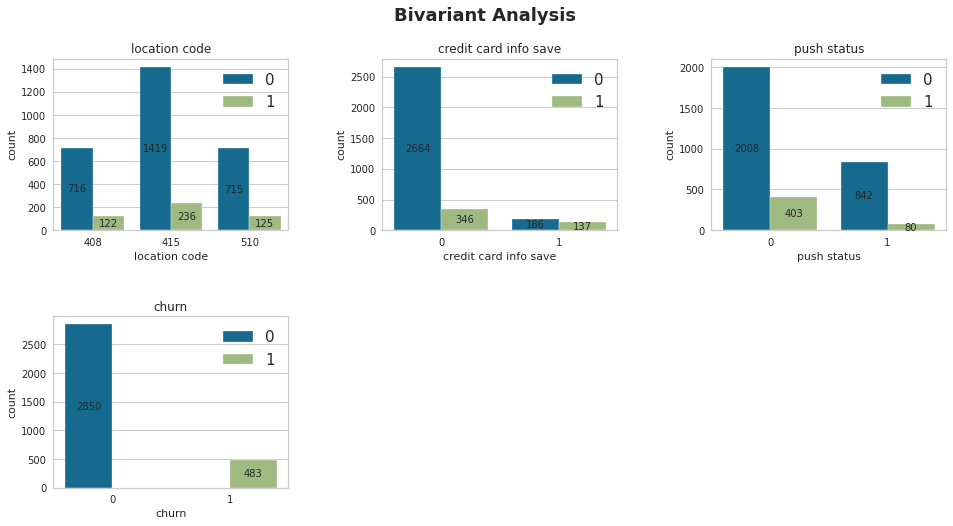

In [ ]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['churn'] )
    a.set_title(col)
    a.bar_label(a.containers[0] , label_type='center') 
    a.bar_label(a.containers[1] , label_type='center')
    a.legend(fontsize=15)

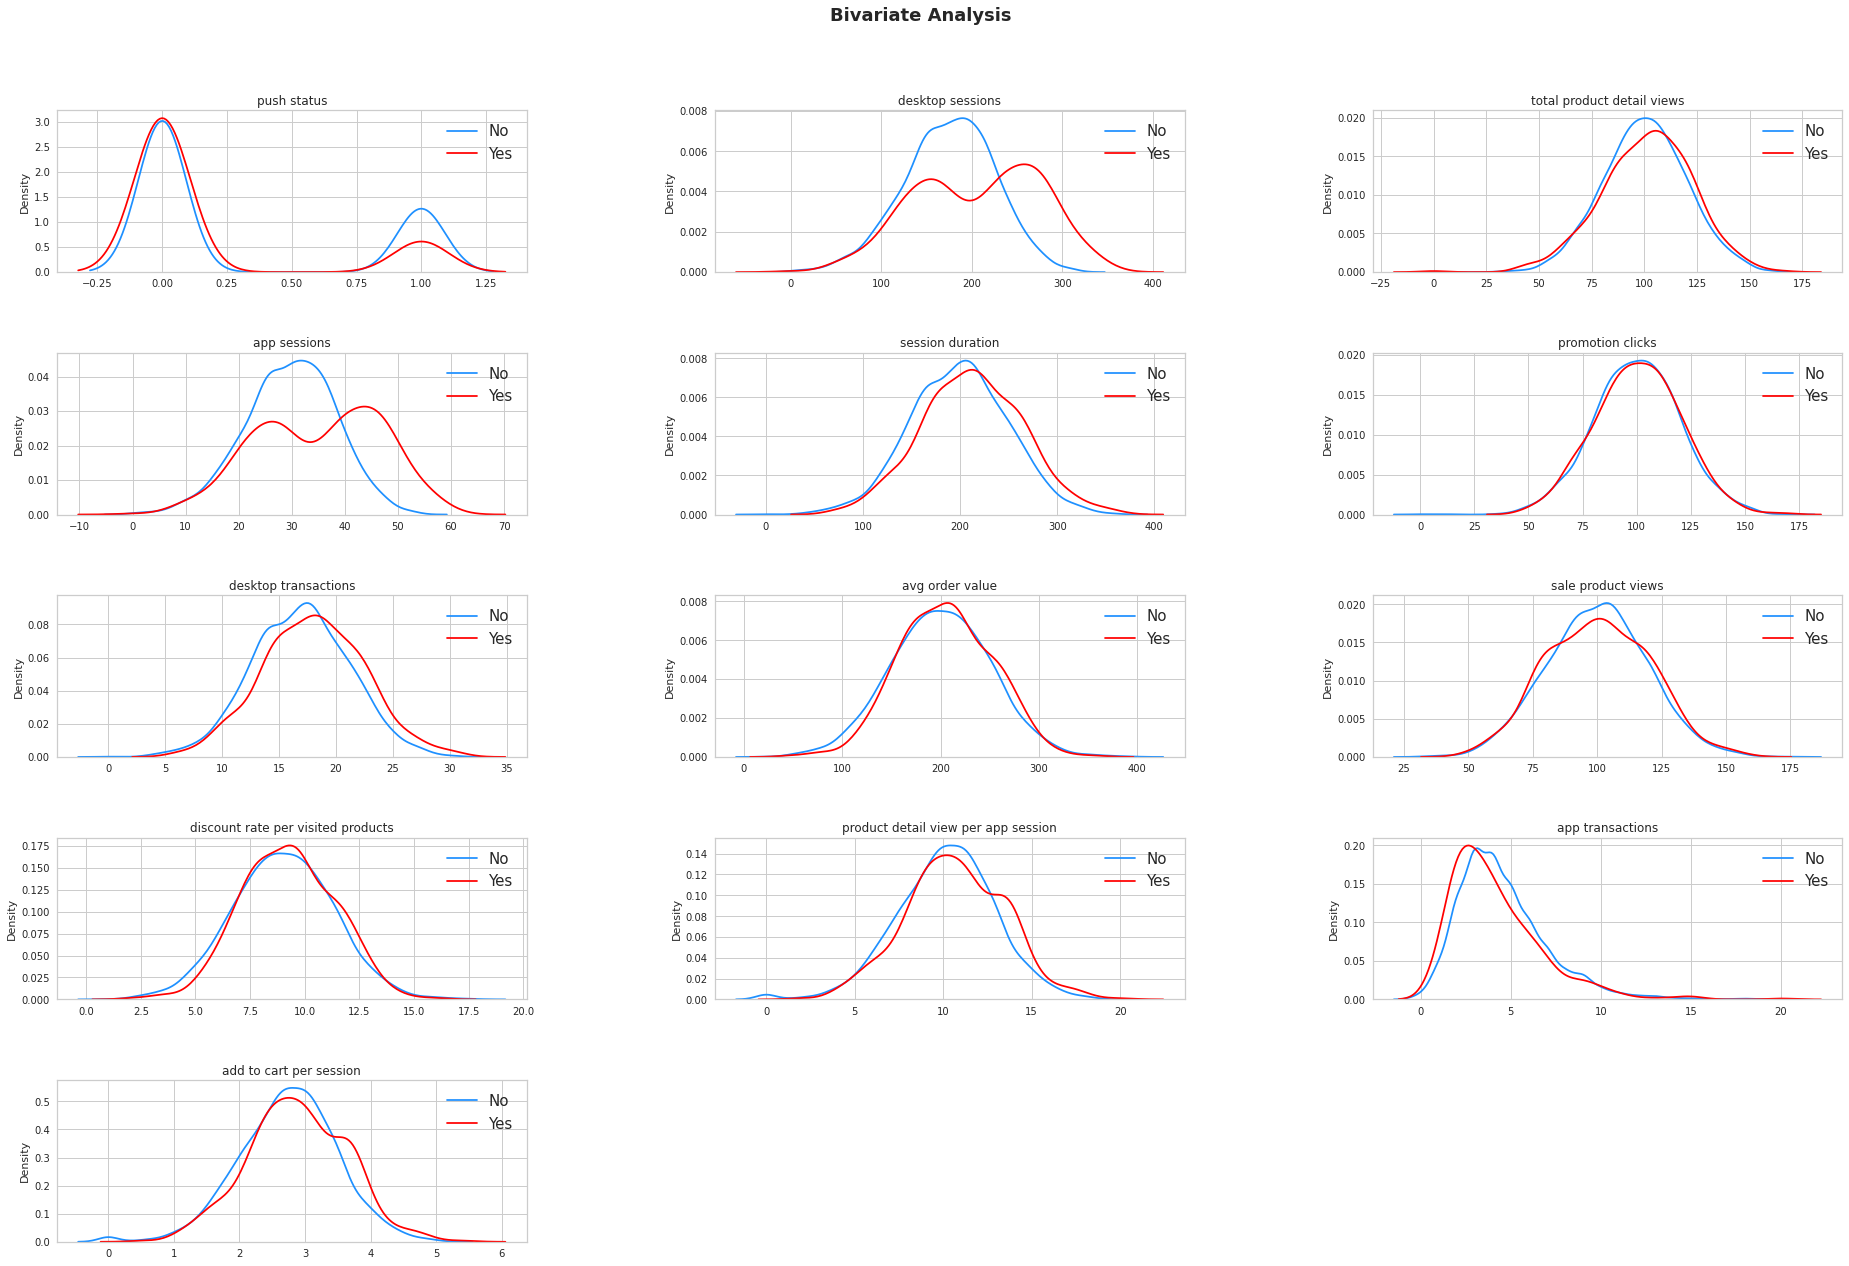

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(6, 3, i+1)
    
    sns.distplot(x =df[df['churn']==0][col],  color='dodgerblue' , ax=a ,  hist =False)
    sns.distplot(x =df[df['churn']==1][col],  color='red' , ax=a , hist =False) 
    a.set_title(col)    
    labels = ['No' , 'Yes']
    a.legend( labels  , fontsize = 15)

oiutlier detection

In [ ]:
df_num = df[Num_cols]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

push status                            False
desktop sessions                        True
total product detail views              True
app sessions                            True
session duration                        True
promotion clicks                        True
desktop transactions                    True
avg order value                         True
sale product views                      True
discount rate per visited products      True
product detail view per app session     True
app transactions                        True
add to cart per session                 True
dtype: bool

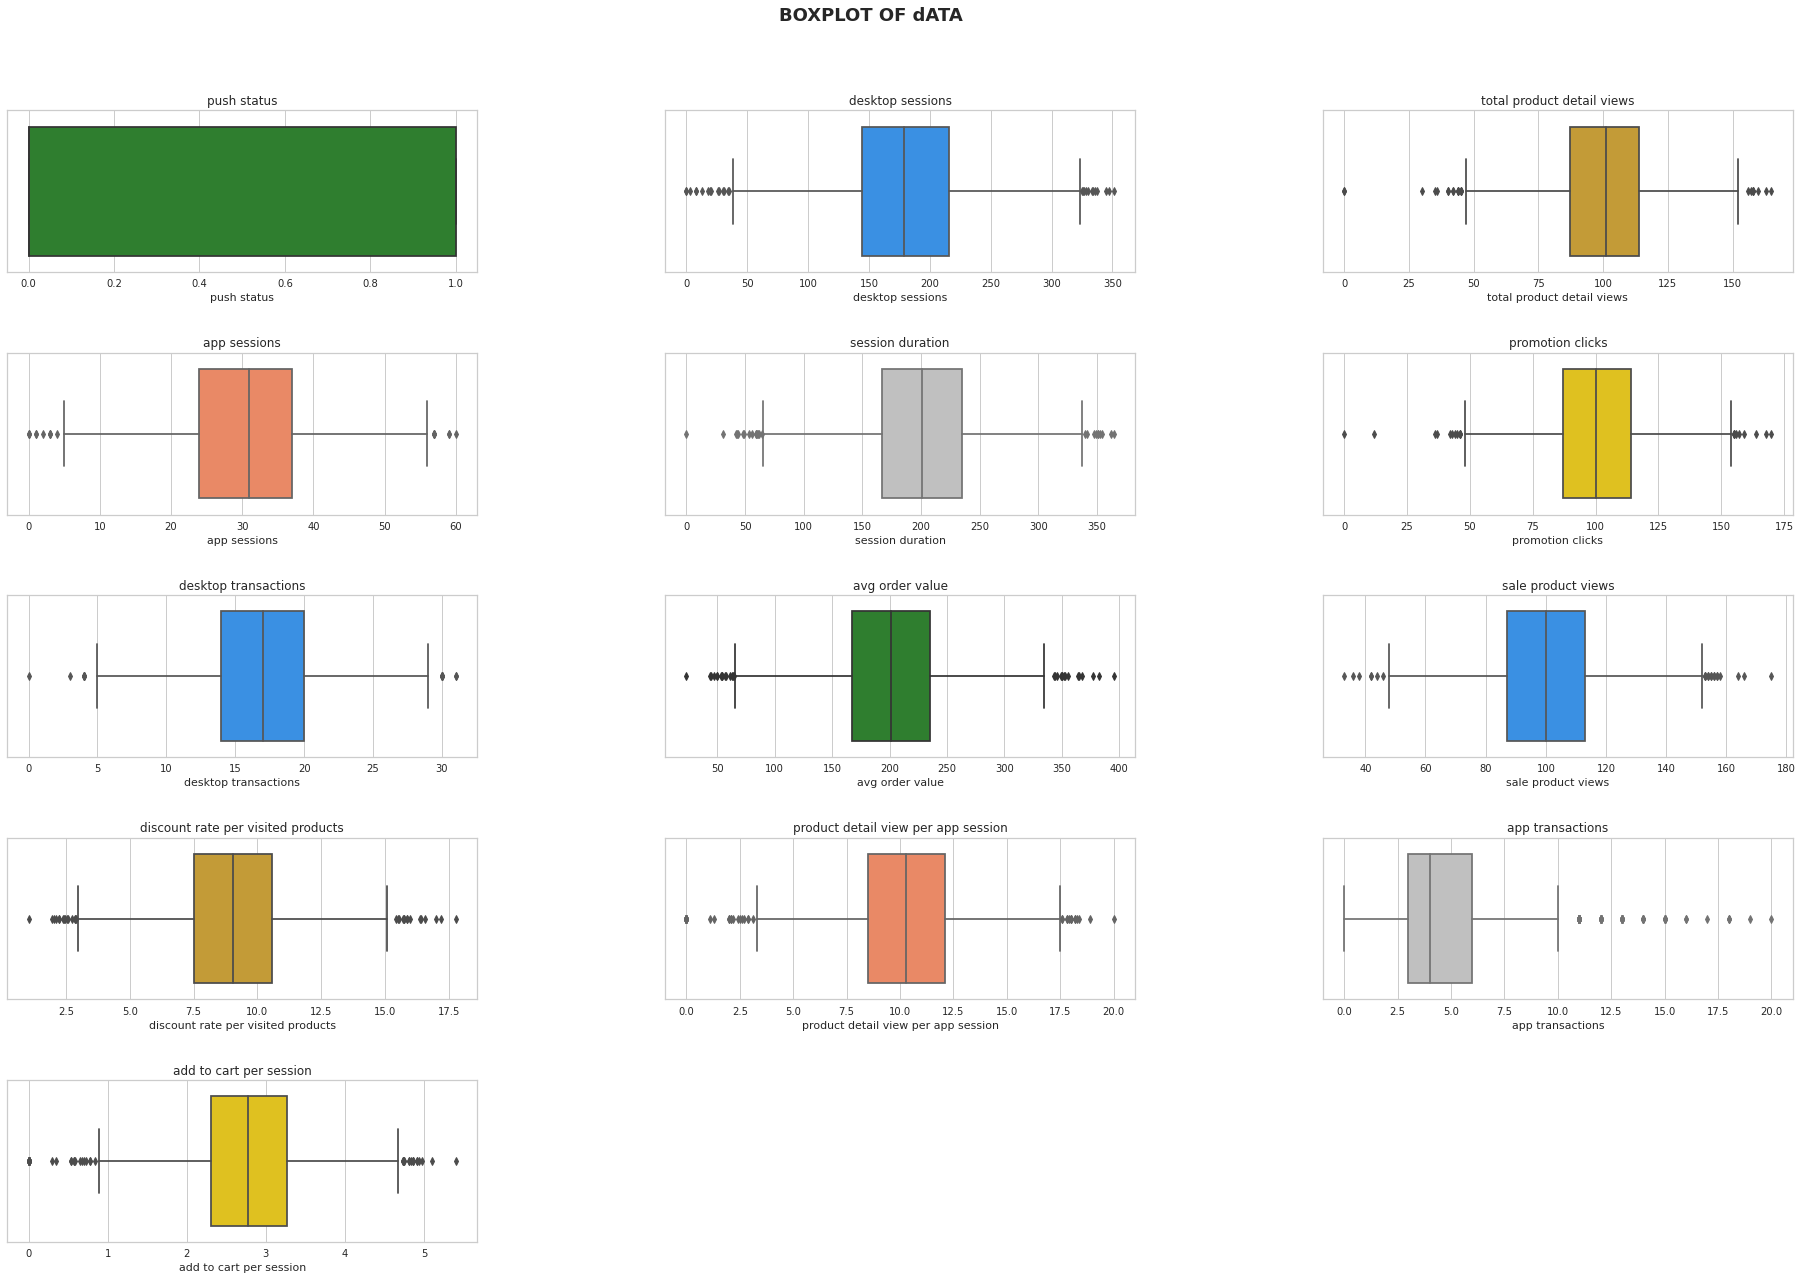

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

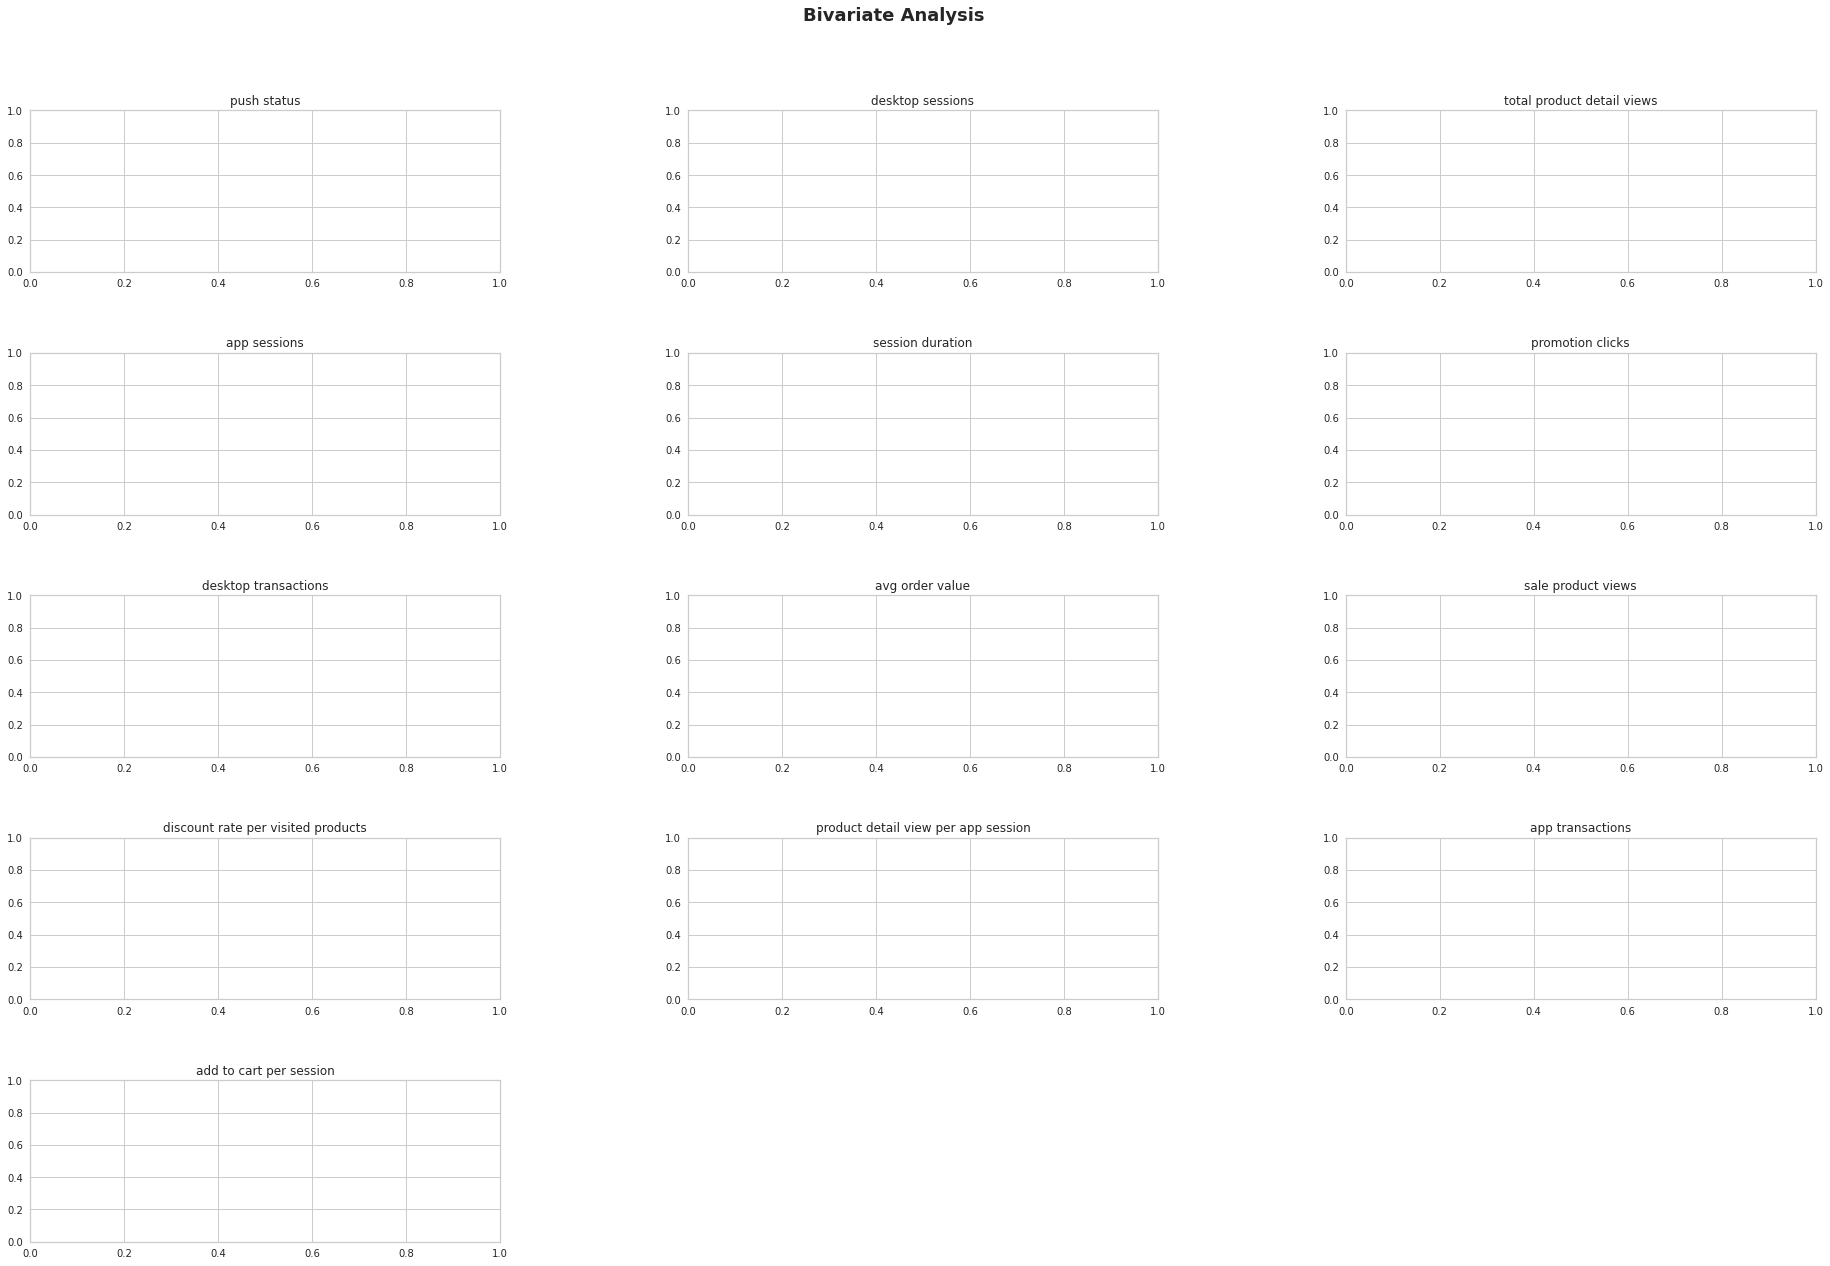

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(6, 3, i+1)
    
    sns.distplot(x =df[df['churn']=='0'][col],  color='dodgerblue' , ax=a ,  hist =False)
    sns.distplot(x =df[df['churn']=='1'][col],  color='red' , ax=a , hist =False) 
    a.set_title(col)    
    labels = ['No' , 'Yes']
    a.legend( labels  , fontsize = 15)

feature engineering

In [ ]:
df

,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,415,3824657,0,1,25,265,45,17,110,197,87,244.70,91,11.01,10.00,3,2.70,1,0
1,415,3717191,0,1,26,162,27,17,123,196,103,254.40,103,11.45,13.70,3,3.70,1,0
2,415,3581921,0,0,0,243,41,10,114,121,110,162.60,104,7.32,12.20,5,3.29,0,0
3,408,3759999,1,0,0,299,51,5,71,62,88,196.90,89,8.86,6.60,7,1.78,2,0
4,415,3306626,1,0,0,167,28,13,113,148,122,186.90,121,8.41,10.10,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,415,4144276,0,1,36,156,27,18,77,216,126,279.10,83,12.56,9.90,6,2.67,2,0
3329,415,3703271,0,0,0,231,39,13,57,153,55,191.30,123,8.61,9.60,4,2.59,3,0
3330,510,3288230,0,0,0,181,31,25,109,289,58,191.90,91,8.64,14.10,6,3.81,2,0
3331,510,3646381,1,0,0,214,36,14,105,160,84,139.20,137,6.26,5.00,10,1.35,2,0


In [ ]:
df["credit card info save"].value_counts(dropna=False)

0    3010
1     323
Name: credit card info save, dtype: int64

In [ ]:
df["push status"].value_counts(dropna=False)

0    2411
1     922
Name: push status, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location code                        3333 non-null   int64  
 1   user id                              3333 non-null   int64  
 2   credit card info save                3333 non-null   int64  
 3   push status                          3333 non-null   int64  
 4   add to wishlist                      3333 non-null   int64  
 5   desktop sessions                     3333 non-null   int64  
 6   app sessions                         3333 non-null   int64  
 7   desktop transactions                 3333 non-null   int64  
 8   total product detail views           3333 non-null   int64  
 9   session duration                     3333 non-null   int64  
 10  promotion clicks                     3333 non-null   int64  
 11  avg order value               

In [ ]:
df['minutes'] = df['desktop sessions'] + df['session duration'] + df['avg order value']
df['calls'] = df['total product detail views'] + df['promotion clicks'] + df['sale product views']
df['charge'] = df['app sessions'] + df['desktop transactions'] + df['discount rate per visited products']



df.drop(columns= ['user id', 'location code'], inplace= True)

In [ ]:
df.drop(columns=['app sessions', 'desktop transactions','discount rate per visited products',
                'total product detail views','promotion clicks', 'sale product views', 'desktop sessions', 
                 'session duration', 'avg order value'], inplace=True)

In [ ]:
# df["credit card info save"]=df["credit card info save"].replace(",",".",regex=True).astype(float)

In [ ]:
df.head() 

,credit card info save,push status,add to wishlist,product detail view per app session,app transactions,add to cart per session,customer service calls,churn,minutes,calls,charge
0,0,1,25,10.00,3,2.70,1,0,706.70,288,73.01
1,0,1,26,13.70,3,3.70,1,0,612.40,329,55.45
2,0,0,0,12.20,5,3.29,0,0,526.60,328,58.32
3,1,0,0,6.60,7,1.78,2,0,557.90,248,64.86
4,1,0,0,10.10,3,2.73,3,0,501.90,356,49.41


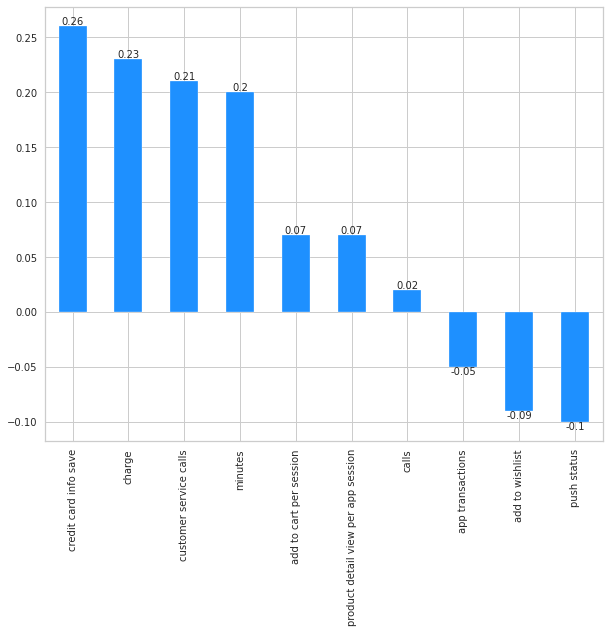

In [ ]:
ax = round(df.corr()['churn'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='dodgerblue' , figsize = (10,8))
ax.bar_label(ax.containers[0])
plt.show() 

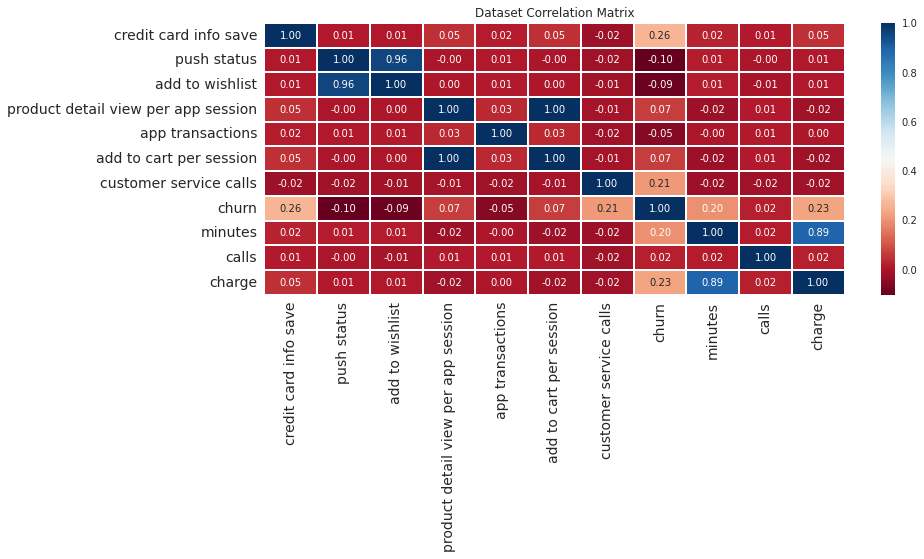

In [ ]:
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix')
fig.show() 

 # preprocessing 


In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score , classification_report , confusion_matrix  ,roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve , auc ,f1_score , plot_confusion_matrix , precision_score , recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [182]:
X = df.drop('churn' , 1 )
y = df['churn'] 

In [183]:
X_train , X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.20 , random_state = 42)

#Recursive feature elimination

In [185]:
rfe = RFE(RandomForestClassifier(), n_features_to_select = 7, step = 1)

rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=7)

In [186]:
selected = X_train.columns[rfe.support_]

In [187]:
rfe.ranking_

array([1, 4, 2, 1, 1, 1, 1, 1, 3, 1])

In [222]:
X_train = X_train[selected]
X_test = X_test[selected]

In [223]:
X_train

,credit card info save,product detail view per app session,app transactions,add to cart per session,customer service calls,minutes,charge
817,0,6.60,6,1.78,2,524.20,41.89
1373,0,4.10,4,1.11,4,514.90,44.40
679,1,8.70,9,2.35,1,757.00,75.36
56,0,8.00,2,2.16,1,447.80,43.34
1993,0,4.50,3,1.22,0,696.00,69.63
...,...,...,...,...,...,...,...
1095,0,6.00,3,1.62,1,633.80,71.24
1130,0,12.70,2,3.43,1,467.60,32.32
1294,0,9.20,5,2.48,1,534.60,45.31
860,0,9.90,6,2.67,2,582.60,55.29


In [224]:
from sklearn.model_selection import train_test_split

Once 0,8 train ile calisalim

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling and Model Performance

In [232]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

Veee Random Forest

In [233]:
from sklearn.ensemble import RandomForestClassifier

In [234]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[565   1]
 [ 18  83]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       566
           1       0.99      0.82      0.90       101

    accuracy                           0.97       667
   macro avg       0.98      0.91      0.94       667
weighted avg       0.97      0.97      0.97       667


Train_Set
[[2284    0]
 [   0  382]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2284
           1       1.00      1.00      1.00       382

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666



In [235]:
model = RandomForestClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.97
test_precision_micro   0.97
test_recall_micro      0.97
test_f1_micro          0.97
dtype: float64

In [236]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
charge,0.32
customer service calls,0.15
minutes,0.11
credit card info save,0.10
app transactions,0.07
product detail view per app session,0.06
add to cart per session,0.06
add to wishlist,0.05
calls,0.05
push status,0.04


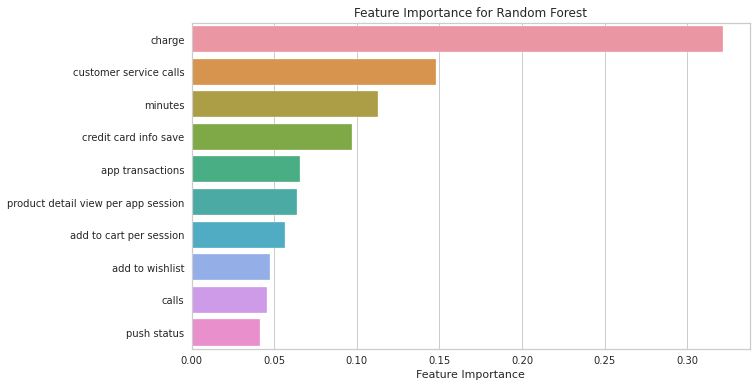

In [237]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

HyperParameters

In [238]:
from sklearn.tree import plot_tree

def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[0], feature_names=X.columns, 
          class_names=df.churn.unique(),
          filled = True,
          fontsize = 8);

In [239]:
pruned_tree = RandomForestClassifier()
pruned_tree.fit(X_train,y_train)

RandomForestClassifier()



Test Set
[[565   1]
 [ 17  84]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       566
           1       0.99      0.83      0.90       101

    accuracy                           0.97       667
   macro avg       0.98      0.91      0.94       667
weighted avg       0.97      0.97      0.97       667



Train Set
[[2284    0]
 [   0  382]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2284
           1       1.00      1.00      1.00       382

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666



TypeError: ignored

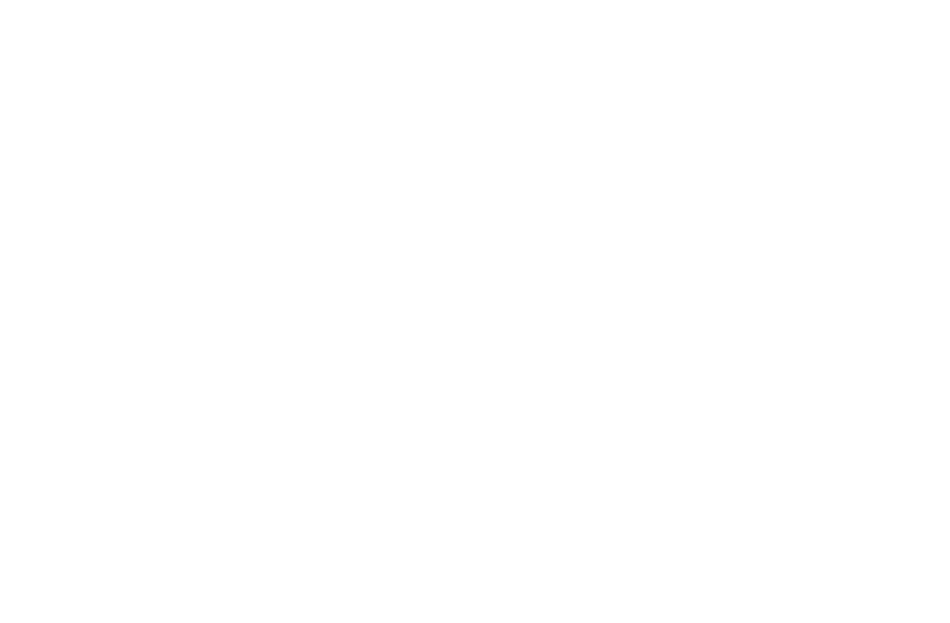

In [240]:
report_model(pruned_tree)

### Prediction 

In [241]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit card info save,3333.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
push status,3333.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00
add to wishlist,3333.00,8.10,13.69,0.00,0.00,0.00,20.00,51.00
product detail view per app session,3333.00,10.24,2.79,0.00,8.50,10.30,12.10,20.00
app transactions,3333.00,4.48,2.46,0.00,3.00,4.00,6.00,20.00
add to cart per session,3333.00,2.76,0.75,0.00,2.30,2.78,3.27,5.40
customer service calls,3333.00,1.56,1.32,0.00,1.00,1.00,2.00,9.00
churn,3333.00,0.14,0.35,0.00,0.00,0.00,0.00,1.00
minutes,3333.00,581.72,89.97,274.80,521.40,583.40,642.60,877.10
calls,3333.00,300.65,34.33,188.00,278.00,301.00,324.00,410.00


## Evaluating ROC Curves and AUC

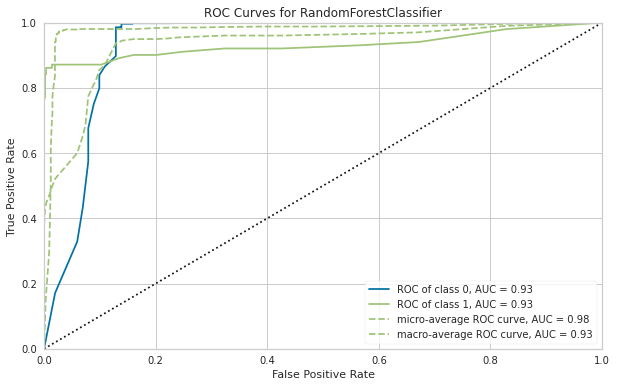

In [242]:
from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

In [243]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=42)

__Cross Validate__

In [214]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy    0.97
test_precision   0.96
test_recall      0.81
test_f1          0.87
dtype: float64

#Grid Search

In [215]:
param_grid = {'n_estimators':[50, 64, 100, 128, 300],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [216]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [218]:
rf_grid_model.best_params_

{'max_depth': 3,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [219]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[550  16]
 [ 13  88]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       566
           1       0.85      0.87      0.86       101

    accuracy                           0.96       667
   macro avg       0.91      0.92      0.92       667
weighted avg       0.96      0.96      0.96       667


Train_Set
[[2208   76]
 [  55  327]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2284
           1       0.81      0.86      0.83       382

    accuracy                           0.95      2666
   macro avg       0.89      0.91      0.90      2666
weighted avg       0.95      0.95      0.95      2666



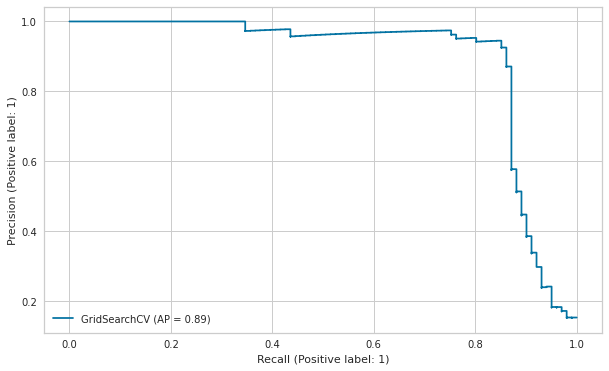

In [220]:
plot_precision_recall_curve(rf_grid_model, X_test, y_test);

simdi Once 0,6  train ile calisalim

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Modelling and Model Performance

In [245]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

Veee Random Forest

In [246]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[1136    2]
 [  34  162]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1138
           1       0.99      0.83      0.90       196

    accuracy                           0.97      1334
   macro avg       0.98      0.91      0.94      1334
weighted avg       0.97      0.97      0.97      1334


Train_Set
[[1712    0]
 [   0  287]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1712
           1       1.00      1.00      1.00       287

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999



In [247]:
model = RandomForestClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.97
test_precision_micro   0.97
test_recall_micro      0.97
test_f1_micro          0.97
dtype: float64

In [248]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
charge,0.31
customer service calls,0.14
minutes,0.11
credit card info save,0.09
app transactions,0.07
product detail view per app session,0.06
add to cart per session,0.06
add to wishlist,0.06
calls,0.05
push status,0.05


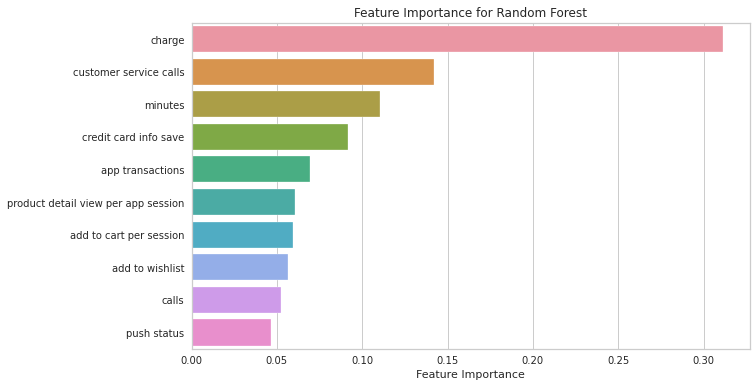

In [249]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

HyperParameters

In [250]:
from sklearn.tree import plot_tree

def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[0], feature_names=X.columns, 
          class_names=df.churn.unique(),
          filled = True,
          fontsize = 8);

In [251]:
pruned_tree = RandomForestClassifier()
pruned_tree.fit(X_train,y_train)

RandomForestClassifier()



Test Set
[[1136    2]
 [  35  161]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1138
           1       0.99      0.82      0.90       196

    accuracy                           0.97      1334
   macro avg       0.98      0.91      0.94      1334
weighted avg       0.97      0.97      0.97      1334



Train Set
[[1712    0]
 [   0  287]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1712
           1       1.00      1.00      1.00       287

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999



TypeError: ignored

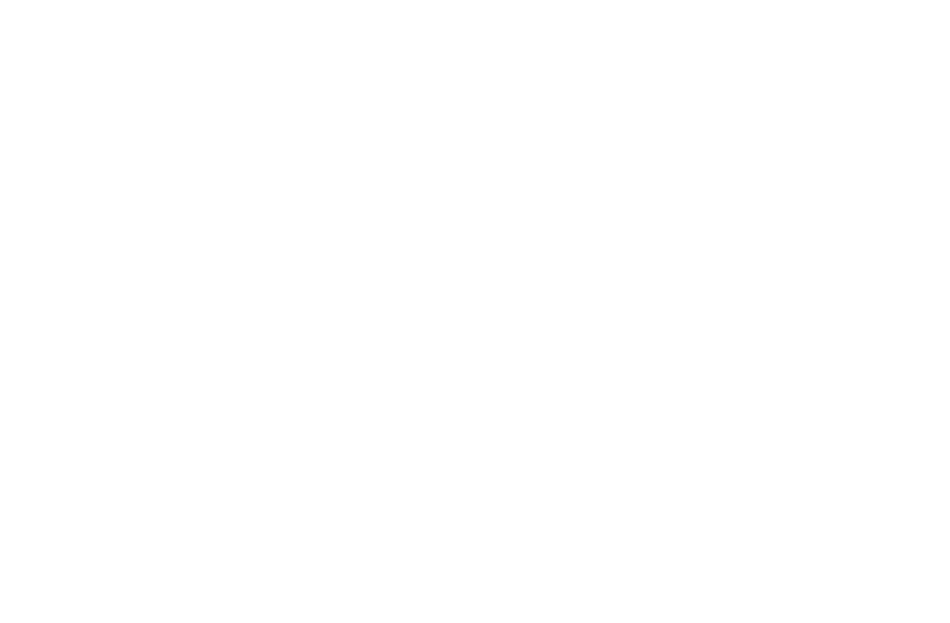

In [252]:
report_model(pruned_tree)

Evaluating ROC Curves and AUC

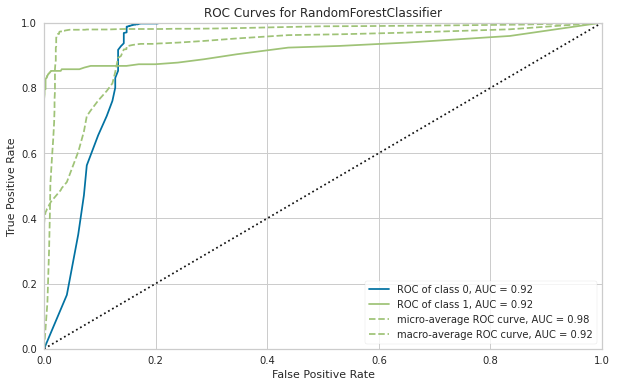

In [253]:
from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

In [254]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=42)

Cross Validate

In [255]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy    0.97
test_precision   0.96
test_recall      0.81
test_f1          0.88
dtype: float64

Grid Search

In [256]:
param_grid = {'n_estimators':[50, 64, 100, 128, 300],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [257]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [258]:
rf_grid_model.best_params_

{'max_depth': 3,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [259]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[1095   43]
 [  29  167]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1138
           1       0.80      0.85      0.82       196

    accuracy                           0.95      1334
   macro avg       0.88      0.91      0.90      1334
weighted avg       0.95      0.95      0.95      1334


Train_Set
[[1658   54]
 [  40  247]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1712
           1       0.82      0.86      0.84       287

    accuracy                           0.95      1999
   macro avg       0.90      0.91      0.91      1999
weighted avg       0.95      0.95      0.95      1999



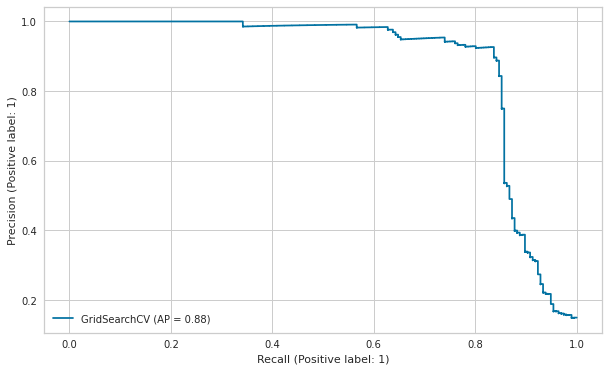

In [260]:
plot_precision_recall_curve(rf_grid_model, X_test, y_test);

In [269]:
def maxProfit(price, start, end):
 
    # If the stocks can't be bought
    if (end <= start):
        return 0
 
    # Initialise the profit
    profit = 0
 
    # The day at which the stock
    # must be bought
    for i in range(start, end, 1):
 
        # The day at which the
        # stock must be sold
        for j in range(i+1, end+1):
 
            # If buying the stock at ith day and
            # selling it at jth day is profitable
            if (price[j] > price[i]):
 
                # Update the current profit
                curr_profit = price[j] - price[i] +\
                    maxProfit(price, start, i - 1) + \
                    maxProfit(price, j + 1, end)
 
                # Update the maximum profit so far
                profit = max(profit, curr_profit)
 
    return profit
 
 
# Driver code
if __name__ == '__main__':
    price = [10,15,8,21,23,12]
    n = len(price)
 
    print(maxProfit(price, 0, n - 1))

20


In [273]:
from collections import deque


def stock_max_profit(prices):
    max = 0
    prices = deque(prices)
    buy_price = prices.popleft()


    for price in prices:


        if price < buy_price:
            buy_price = price


        else:
            profit = price - buy_price


            if profit > max:
                max = profit


    if max:
        return max
    else:
        return -1


prices = [10,9,8,7,6,5,4]
max_profit = stock_max_profit(prices)
print(max_profit)

-1


In [275]:
data = ["B:-1";, "A:1", "B:3","A:5"]
{'B': '-1, 'tea':5, 'coffee':6},
{'name': 'A', 'tea':2, 'coffee':3},
{'name': 'B', 'tea':7, 'coffee':1},
{'name': 'B', 'tea':9, 'coffee':4},
]
import itertools
final_data = [(a, list(b)) for a, b in itertools.groupby([i.items() for i in data], key=lambda x:dict(x)["name"])] 
new_final_data = [{i[0][0]:sum(c[-1] for c in i if isinstance(c[-1], int)) if i[0][0] != "name" else i[0][-1] for i in zip(*b)} for a, b in final_data]

AttributeError: ignored